# The history behind the magic of Perceptron model

Frank Rosenblatt, an American psychologist, proposed the **classical perceptron** model(1958). A computational model which is more generalized than McCulloch-Pitts neurons. The major difference between MP neuron and perceptron is that numerical weights for input is introduced and a mechanism for learning these weights. Inputs in Perceptron can be binary where R∈{0,1} or it can be any real value.


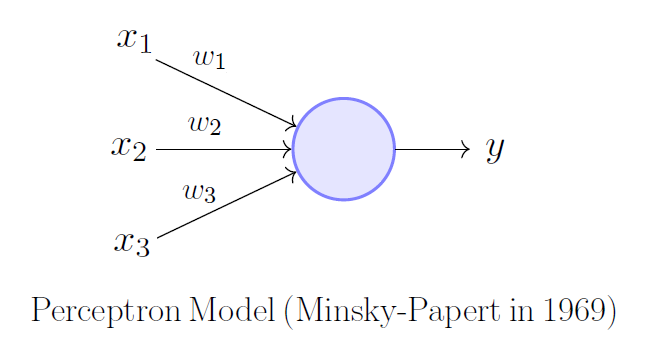

• **Predict y=1** if the summation of W(i) and X(i) is greater than or equal to the threshold value.

• **predict y=0** if the value of y=0 if the summation of W(i) and X(i) is less than the threshold (also called as bias)

# **what kind of functions can be implemented by perceptron?**
A single perceptron can be used to implement linearly seperable functions which can learn the weights including the threshold & the inputs can be real valued

# MP neuron vs Single Perceptron vs Multi Layered Perceptron

1. MP neuron(McCulloch Pitts) :This model imitates the functionality of biological neuron, thus called as Artificial Neuron.
It accepts binary input and produces binary output based on a certain threshold values(θ)
Applicable to linearly seperable functions.
2. Perceptron Model: Linear machine learning algorithm for binary classification tasks.
Real valued inputs are allowed in perceptron
Applicable to linearly seperable functions.
3. MultiLayered Perceptron: It is a network of perceptrons which can deal with linearly inseperable data

# Terminology
• The layer containing the inputs(x1,x2) is called the **input layer**
• The middle layer containing 4 perceptrons is called the **hidden layer**
• The final layer containing one output neuron is called the **output layer**
• The outputs of 4 perceptrons in hidden layer are denoted by h1,h2,h3,h4.
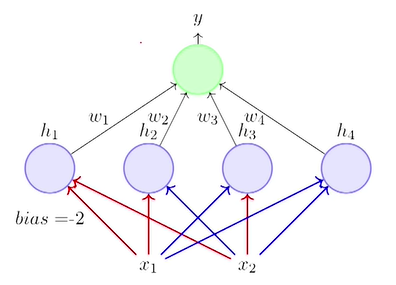

• This network is capable of implementing any boolean function either it be linearly seperable or not! That means MLP with one hidden layer solves all complex boolean functions and becomes the hero by saving our ass from non-linear behaviour of data.(Here no two perceptrons fire for the same input)

• Any boolean function of n inputs can be represented exactly by a network of perceptrons(MLP) containing 1 hidden layer with 2^n perceptrons and one output layer containing 1 perceptron.
**Note**: As n increases the number of perceptrons in the hidden layer obviously increases exponentially.

# Let's make our first Perceptron Model using Scikit-Learn

we will start by importing the necessary libraries.

In [1]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

First, let’s define a synthetic classification dataset.

We will use the make_classification() function to create a dataset with 1,000 examples, each with 10 input variables.

In [2]:
#test classification dataset
from sklearn.datasets import make_classification
#define dataset
X,y=make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
#summarize the dataset
X.shape,y.shape

((1000, 10), (1000,))

The Perceptron algorithm is available via the Perceptron class in the sci-kit-learn Python machine learning library.


In [3]:
from sklearn.linear_model import Perceptron
model=Perceptron()
model.fit(X, y)

Perceptron()

# What do we need RepeatedStratifiedKFold procedure?
• The k-fold cross-validation procedure is a standard method for estimating the performance of a machine learning algorithm or configuration on a dataset.

• A single run of the k-fold cross-validation procedure may result in a noisy estimate of model performance. Different splits of the data may result in very different results.

In [4]:
#evaluate the performance
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

In [5]:
#evaluate the score by cross-validation
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [6]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.847 (0.055)


Running the example will analyze the perceptron model on the dataset and reports the average accuracy across the 2 repeats of 10-fold cross-validation.

In [7]:
#define new data for prediction 
row = [0.12777556,-3.64400522,-2.23268854,-1.82114386,1.75466361,0.1243966,1.03397657,2.35822076,1.01001752,0.56768485]

In [8]:
#now is the moment of truth. Hold tight!
yhat=model.predict([row])
print('predicted class: %d'% yhat)

predicted class: 1


# What is the importance of hyperparameter tuning? 
Hyperparameters are crucial as they control the overall behaviour of a machine learning model. The ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.So, let's start by testing some learning rates which could fit in our model like salt in a glass of water!

In [9]:
grid=dict()
grid['eta0']=[0.00001,0.0001,0.001,0.01,0.1,1.0]
grid['max_iter'] = [1, 10, 100, 1000, 10000]

we will use [GridSearchCV class](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) with a grid of values we just defined above.

In [10]:
# grid search learning rate for the perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = Perceptron()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))


Mean Accuracy: 0.857
Config: {'eta0': 1e-05, 'max_iter': 10}
>0.850 with: {'eta0': 1e-05, 'max_iter': 1}
>0.857 with: {'eta0': 1e-05, 'max_iter': 10}
>0.857 with: {'eta0': 1e-05, 'max_iter': 100}
>0.857 with: {'eta0': 1e-05, 'max_iter': 1000}
>0.857 with: {'eta0': 1e-05, 'max_iter': 10000}
>0.850 with: {'eta0': 0.0001, 'max_iter': 1}
>0.857 with: {'eta0': 0.0001, 'max_iter': 10}
>0.857 with: {'eta0': 0.0001, 'max_iter': 100}
>0.857 with: {'eta0': 0.0001, 'max_iter': 1000}
>0.857 with: {'eta0': 0.0001, 'max_iter': 10000}
>0.850 with: {'eta0': 0.001, 'max_iter': 1}
>0.857 with: {'eta0': 0.001, 'max_iter': 10}
>0.857 with: {'eta0': 0.001, 'max_iter': 100}
>0.857 with: {'eta0': 0.001, 'max_iter': 1000}
>0.857 with: {'eta0': 0.001, 'max_iter': 10000}
>0.850 with: {'eta0': 0.01, 'max_iter': 1}
>0.846 with: {'eta0': 0.01, 'max_iter': 10}
>0.853 with: {'eta0': 0.01, 'max_iter': 100}
>0.853 with: {'eta0': 0.01, 'max_iter': 1000}
>0.853 with: {'eta0': 0.01, 'max_iter': 10000}
>0.850 with: {'eta0